Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


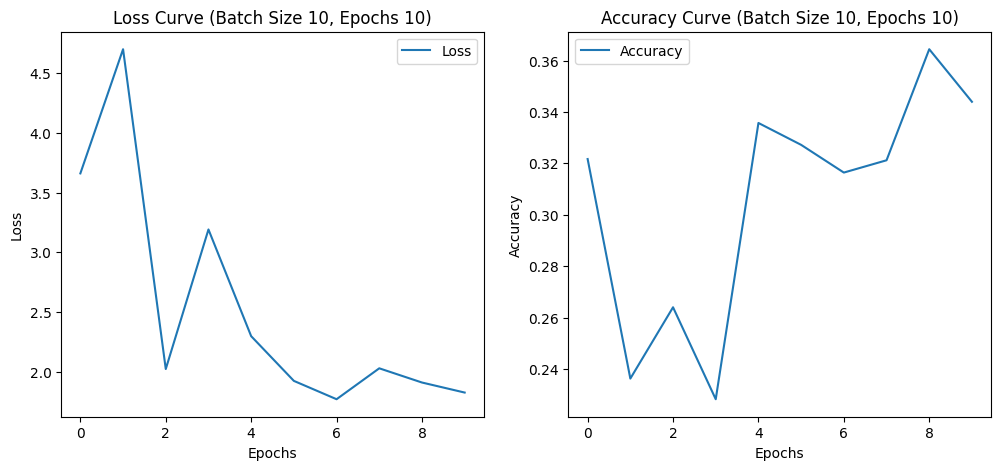

Batch Size: 10, Epochs: 10
Test Accuracy: 0.3421
Confusion Matrix:
[[   0    0    0    0  980    0    0    0    0    0]
 [   0  928    0    2  203    0    0    1    0    1]
 [   0    0  327    0  704    0    0    1    0    0]
 [   0    0    0  544  458    0    0    0    0    8]
 [   0    0    0    0  982    0    0    0    0    0]
 [   0    0    0    0  891    0    0    0    1    0]
 [   0    2    0    0  955    0    1    0    0    0]
 [   0    0    0    1  386    0    0  639    0    2]
 [   0    1    0    0  973    0    0    0    0    0]
 [   0    0    0    0 1008    0    0    1    0    0]]
Execution Time: 1641.82 seconds

Results saved to mnist_nn_results_E(10)_B(10).csv


In [1]:
import tensorflow as tf
import numpy as np
import time
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train.reshape(-1, 784).astype(np.float32) / 255.0, x_test.reshape(-1, 784).astype(np.float32) / 255.0

y_train = tf.one_hot(y_train, depth=10, dtype=tf.float32)
y_test_labels = y_test  # Store original labels for confusion matrix
y_test = tf.one_hot(y_test, depth=10, dtype=tf.float32)

# Define model parameters
n_hidden = 256
W1 = tf.Variable(tf.random.normal([784, n_hidden], dtype=tf.float32))
b1 = tf.Variable(tf.random.normal([n_hidden], dtype=tf.float32))
W2 = tf.Variable(tf.random.normal([n_hidden, 10], dtype=tf.float32))
b2 = tf.Variable(tf.random.normal([10], dtype=tf.float32))

# Define model
def model(X):
    Z1 = tf.add(tf.matmul(X, W1), b1)
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(A1, W2), b2)
    return Z2

# Loss function
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred))

# Optimizer
optimizer = tf.optimizers.Adam(learning_rate=0.1)

# Single configuration
batch_size = 10
epochs = 10

start_time = time.time()
loss_curve, acc_curve = [], []

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
    for batch_x, batch_y in dataset:
        with tf.GradientTape() as tape:
            logits = model(batch_x)
            loss = loss_fn(batch_y, logits)
        grads = tape.gradient(loss, [W1, b1, W2, b2])
        optimizer.apply_gradients(zip(grads, [W1, b1, W2, b2]))
    
    train_loss = loss_fn(y_train, model(x_train)).numpy()
    train_acc = np.mean(tf.argmax(model(x_train), axis=1) == tf.argmax(y_train, axis=1))
    loss_curve.append(train_loss)
    acc_curve.append(train_acc)

test_acc = np.mean(tf.argmax(model(x_test), axis=1) == tf.argmax(y_test, axis=1))
y_pred = tf.argmax(model(x_test), axis=1).numpy()
conf_matrix = confusion_matrix(y_test_labels, y_pred)
exec_time = time.time() - start_time

# Store results
results = [[batch_size, epochs, train_loss, train_acc, test_acc, exec_time]]

# Plot loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), loss_curve, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'Loss Curve (Batch Size {batch_size}, Epochs {epochs})')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), acc_curve, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title(f'Accuracy Curve (Batch Size {batch_size}, Epochs {epochs})')
plt.legend()

plt.show()

# Print results
print(f"Batch Size: {batch_size}, Epochs: {epochs}")
print(f"Test Accuracy: {test_acc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Execution Time: {exec_time:.2f} seconds\n")

# Save results to file
df = pd.DataFrame(results, columns=["Batch Size", "Epochs", "Train Loss", "Train Accuracy", "Test Accuracy", "Execution Time"])
df.to_csv("mnist_nn_results_E(10)_B(10).csv", index=False)
print("Results saved to mnist_nn_results_E(10)_B(10).csv")
